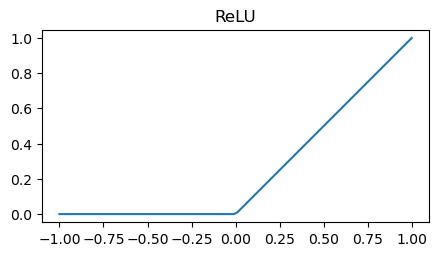

In [3]:
import torch.nn.functional as F
import torch
import numpy as np
import matplotlib.pyplot as plt
a = np.linspace(-1, 1, 100)
res = F.relu(torch.tensor(a))
plt.figure(figsize=(5,2.5))
plt.title("ReLU")
plt.axis("equal")
plt.ylim(( 0,1 ))
plt.plot(a, res.numpy())
plt.show()

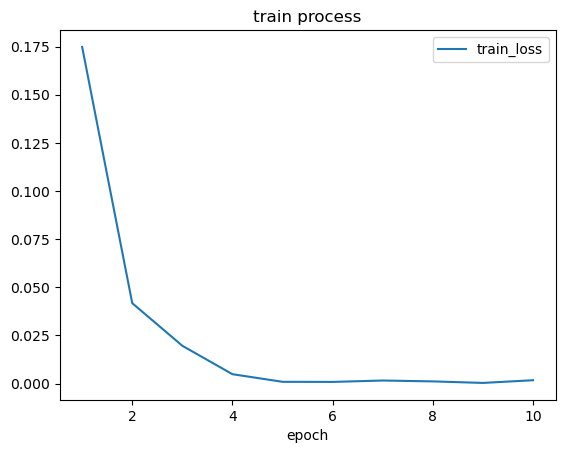

In [6]:
import pandas as pd
res = pd.read_csv("result/2023-11-12 16_34_42-train-loss.csv")
plt.title("train process")
# plt.subplot(121)
plt.plot(res["epoch"], res["train_loss"], label="train_loss")
# plt.subplot(122)
# plt.plot(res["epoch"], res["accuracy_list"], label="eval_accuracy")
plt.xlabel("epoch")
plt.legend()

In [ ]:
import pandas as pd
res = pd.read_csv("result/2023-11-12 02_13_42-train-loss(nopre).csv")
res_pre = pd.read_csv("result/2023-11-12 02_13_42-train-loss(nopre).csv")
plt.title("train process")
# plt.subplot(121)
plt.plot(res["epoch"], res["train_loss"], label="train_loss")
# plt.subplot(122)
plt.plot(res["epoch"], res["accuracy_list"], label="eval_accuracy")
plt.xlabel("epoch")
plt.legend()

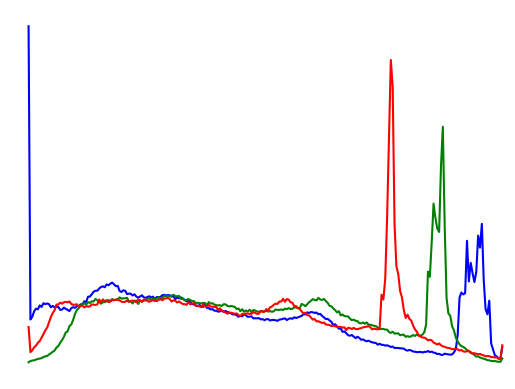

In [24]:
import cv2
img = cv2.imread("C:/Users/mahy/Documents/codes/python/man_nat_classify/test/manmade_test/img208.jpg")
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256]) / img.shape[0] / img.shape[1]
    plt.plot(histr, color=col)
    plt.xlim([-10, 257])
plt.axis('off')
plt.show()

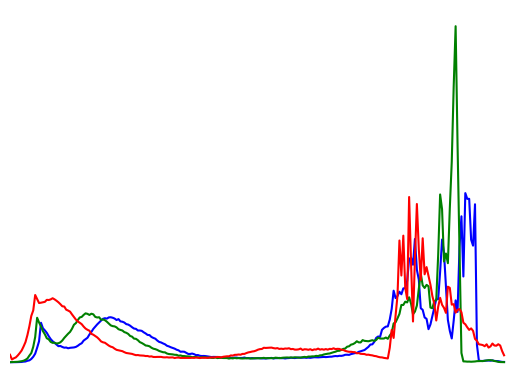

In [22]:
import cv2
img = cv2.imread('C:/Users/mahy/Documents/codes/python/man_nat_classify/test/natural_test/img40.jpg')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256]) / img.shape[0] / img.shape[1]
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.axis('off')
plt.show()

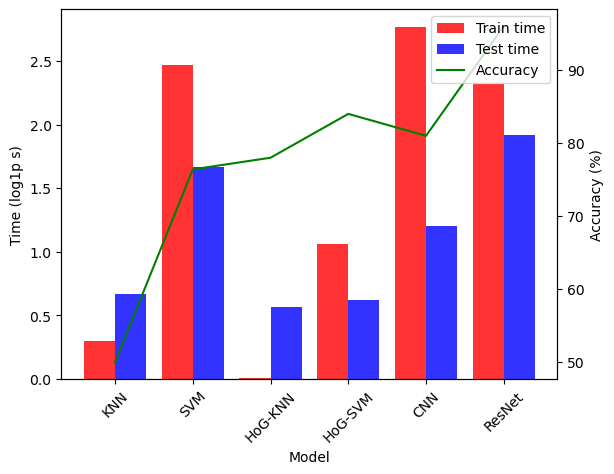

In [40]:
import numpy as np
if __name__ == '__main__':
    X=["KNN", "SVM", "HoG-KNN", "HoG-SVM", "CNN", "ResNet"]
    Y1=np.log10(np.array([1, 296.2, 0.014, 10.5, 587, 210]) + 1)
    Y2=np.log10(np.array([3.7, 45.3, 2.7, 3.2, 15, 82]) + 1)
    Y3=np.array([50, 76.4, 78, 84, 81, 96])
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
    ax1.bar([i - 0.2 for i in range(6)], Y1, color="red", alpha=0.8, width=0.4, label="Train time")
    ax1.set_xlabel("Model")
    ax1.bar([i + 0.2 for i in range(6)], Y2, color="blue",alpha=0.8, width=0.4, label="Test time")
    ax1.set_ylabel("Time (log1p s)")
    ax2 = ax1.twinx()
    ax2.plot(X, Y3, color="Green", label="Accuracy")
    ax2.set_ylabel("Accuracy (%)")
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

In [1]:
import os, cv2
import numpy as np
def get_img_folder(path):
    img_list = []
    file_list = []
    for filename in os.listdir(path):
        if not filename.endswith('.jpg') and not filename.endswith('.jpeg') and not filename.endswith('.png'):
            continue
        image = cv2.resize(cv2.imread(os.path.join(path, filename)), (256, 256), interpolation=cv2.INTER_AREA)
        # image = np.multiply(image, 1/255)
        img_list.append(image)
        file_list.append(filename)
    return img_list, file_list

def get_img_folder_gray(path):
    img_list = []
    file_list = []
    for filename in os.listdir(path):
        if not filename.endswith('.jpg') and not filename.endswith('.jpeg') and not filename.endswith('.png'):
            continue
        image = cv2.resize(cv2.imread(os.path.join(path, filename), 0), (256, 256), interpolation=cv2.INTER_AREA)
        image = np.multiply(image, 1/255)
        img_list.append(image)
        file_list.append(filename)
    return img_list, file_list

man_test_path = './test/manmade_test'
man_test_list, man_test_file = get_img_folder(man_test_path)
nat_test_path = './test/natural_test'
nat_test_list, nat_test_file = get_img_folder(nat_test_path)

In [19]:
image11 = np.concatenate((man_test_list[300], man_test_list[301], man_test_list[302]), 1)
image12 = np.concatenate((man_test_list[303], man_test_list[304], man_test_list[305]), 1)
image1 = np.concatenate((image11, image12), 1)
image21 = np.concatenate((nat_test_list[300], nat_test_list[301], nat_test_list[302]), 1)
image22 = np.concatenate((nat_test_list[303], nat_test_list[304], nat_test_list[305]), 1)
image2 = np.concatenate((image21, image22), 1)
bar = np.ones((256*3, 10, 3))
image = np.concatenate((image1, image2), 0)
cv2.imshow("test", image)
cv2.waitKey(0)
cv2.imwrite("test.jpg", image)

True

In [7]:
image.shape

(768, 1034, 3)

In [6]:
bar = np.ones((256*3, 10, 3)) * 255
cv2.imshow("test", bar)
cv2.waitKey(0)

-1

In [3]:
import cv2
import os
import numpy as np
from skimage import exposure
from skimage.feature import hog
from skimage import data, color, exposure


def read_path(filename):
    print(filename)
    img = cv2.imread(filename)
    ####change to hog
    image = color.rgb2gray(img)
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(16, 16),
                            block_norm='L2-Hys', visualize=True)
    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    # hog_image_rescaled = np.repeat(hog_image_rescaled[:,:,np.newaxis], 3, axis=2)
    final_img = image * hog_image_rescaled
    print(type(hog_image_rescaled))
    cv2.imwrite("HOG.jpg", final_img)
    cv2.imshow("final_img", final_img)
    cv2.waitKey(0)
    
read_path("C:/Users/mahy/Documents/codes/python/man_nat_classify/test/natural_test/sun_aukksukpanjukfyr.jpg")

"C:/Users/mahy/Documents/codes/python/man_nat_classify/test/natural_test/sun_aukksukpanjukfyr.jpg"


IndexError: tuple index out of range